In [63]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, ShuffleSplit, GroupKFold, GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.svm import SVC

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(f"Testing set score: {logreg.score(X_test, y_test):.2f}")

Testing set score: 0.88


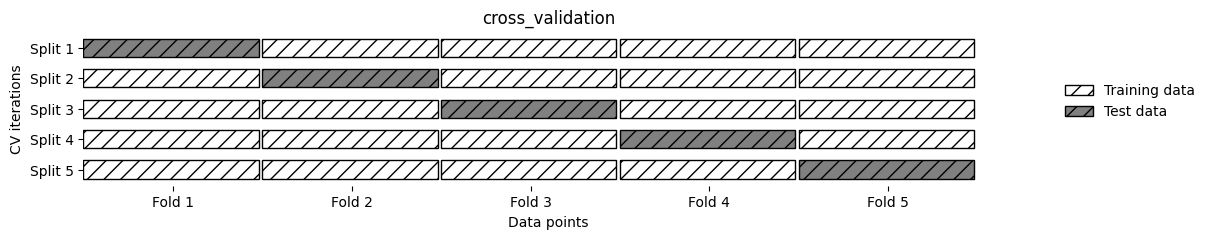

In [5]:
# 5.1. Cross-Validation

mglearn.plots.plot_cross_validation()

In [ ]:
# 5.1.1. Cross-Validation in scikit-learn

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print(f"Cross validation score: {scores}")

Cross validation score: [0.98 0.96 0.98]


In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print(f"Cross validation score: {scores}")

Cross validation score: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
print(f"Cross validation score mean: {scores.mean():.2f}")

Cross validation score mean: 0.97


In [12]:
# 5.1.3. Stratified k-Fold Cross-Validation and Other Strategies

print(f"Iris labels:\n{iris.target}")

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


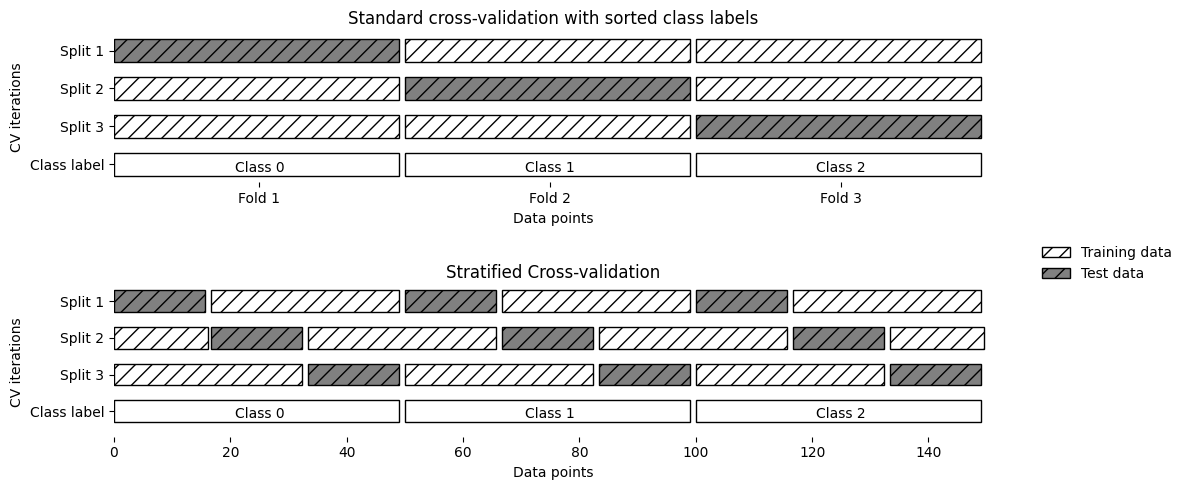

In [13]:
mglearn.plots.plot_stratified_cross_validation()

In [16]:
kfold = KFold(n_splits=5)
print(f"Cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross validation score:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [17]:
kfold = KFold(n_splits=3)
print(f"Cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross validation score:
[0. 0. 0.]


In [18]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f"Cross validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross validation score:
[0.98 0.96 0.96]


In [20]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of iterations cv: ", len(scores))
print(f"Mean accuracy: {scores.mean():.2f}")


Number of iterations cv:  150
Mean accuracy: 0.97


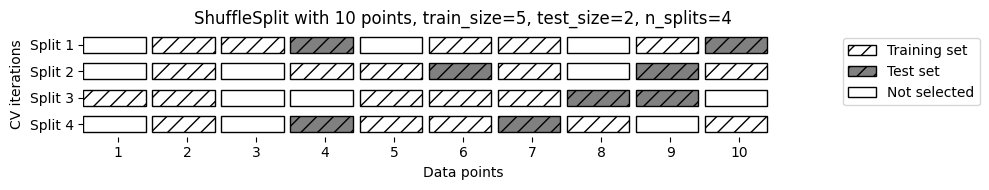

In [21]:
mglearn.plots.plot_shuffle_split()

In [25]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f"Cross validation score:\n{scores}")

Cross validation score:
[0.98666667 0.94666667 0.94666667 0.97333333 0.97333333 0.97333333
 0.94666667 0.97333333 0.97333333 0.97333333]


In [31]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(f"Cross validation score:\n{scores}")

Cross validation score:
[0.75       0.6        0.66666667]


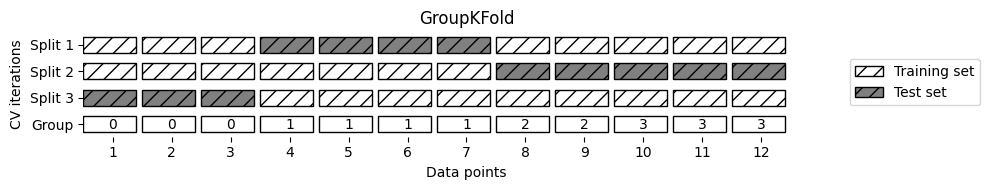

In [33]:
mglearn.plots.plot_group_kfold()

In [37]:
# 5.2. Grid Search

# 5.2.1. Simple Grid Search

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(f"Training set size: {X_train.shape[0]} testing set size: {X_test.shape[0]}")
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print(f"Best score: {best_score:.2f}")
print(f"Best parameters: {best_parameters}")

Training set size: 112 testing set size: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


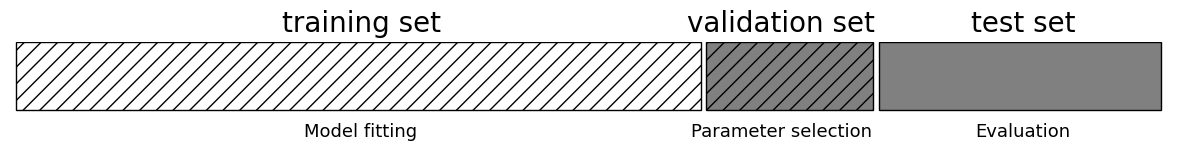

In [3]:
# 5.2.2. The Danger of Overfitting the Parameters and the Validation Set

mglearn.plots.plot_threefold_split()

In [4]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print(f"Training set size: {X_train.shape[0]} validation set size: {X_valid.shape[0]} testing set size: {X_test.shape[0]}\n")
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(f"Best score in validation set: {best_score:.2f}")
print(f"Best parameters: {best_parameters}")
print(f"Best score in testing set with best parameters: {test_score:.2f}")

Training set size: 84 validation set size: 28 testing set size: 38

Best score in validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Best score in testing set with best parameters: 0.92


In [6]:
# 5.2.3. Grid Search with Cross-Validation

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


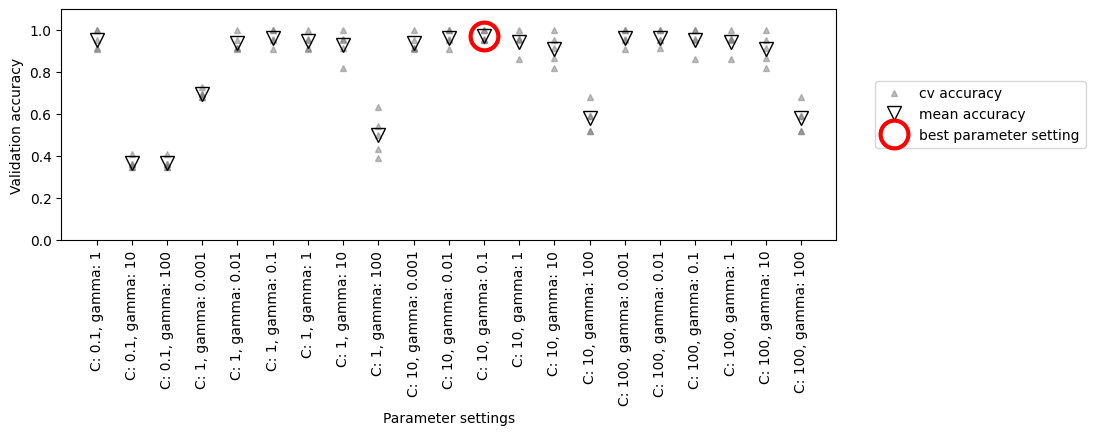

In [7]:
mglearn.plots.plot_cross_val_selection()

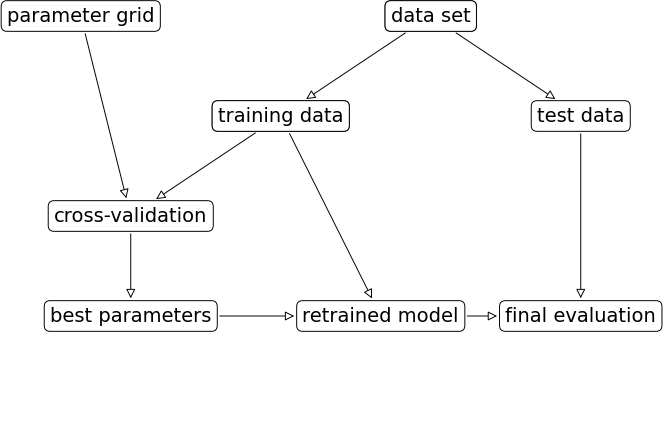

In [8]:
mglearn.plots.plot_grid_search_overview()

In [9]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print(f"Parameters grid:\n{param_grid}")

Parameters grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [11]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print(f"Training set score: {grid_search.best_params_}")
print(f"Cross validation best score: {grid_search.best_score_:.2f}")

Training set score: {'C': 10, 'gamma': 0.1}
Cross validation best score: 0.97


In [12]:
print(f"Best estimator: {grid_search.best_estimator_}")

Best estimator: SVC(C=10, gamma=0.1)


In [15]:
results = pd.DataFrame(grid_search.cv_results_)
pd.set_option('display.max_columns', None)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000590,0.000199,0.000409,0.000147,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000392,0.000003,0.000299,0.000048,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000367,0.000046,0.000264,0.000039,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000318,0.000049,0.000212,0.000026,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000273,0.000021,0.000180,0.000011,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


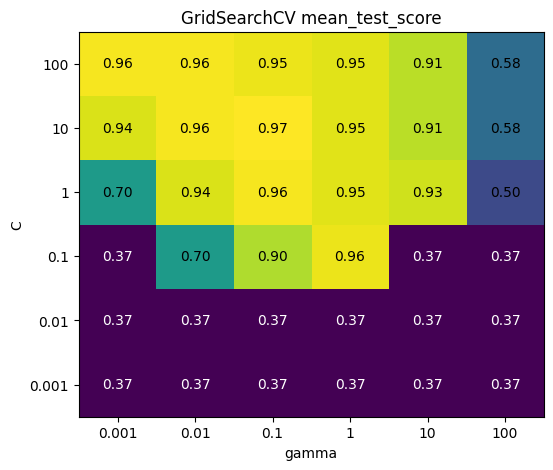

In [40]:
plt.figure(figsize=(6,5))
plt.imshow(scores, cmap="viridis", origin="lower", aspect="auto")
plt.xticks(ticks=np.arange(len(param_grid["gamma"])), labels=param_grid["gamma"])
plt.yticks(ticks=np.arange(len(param_grid["C"])), labels=param_grid["C"])
plt.xlabel("gamma")
plt.ylabel("C")
plt.title("GridSearchCV mean_test_score")

for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.text(j, i, f"{scores[i, j]:.2f}",
                 ha="center", va="center",
                 color="w" if scores[i, j] < 0.5 else "black")

plt.show()

/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_98512/679500110.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')
/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_98512/679500110.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')
/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_98512/679500110.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.

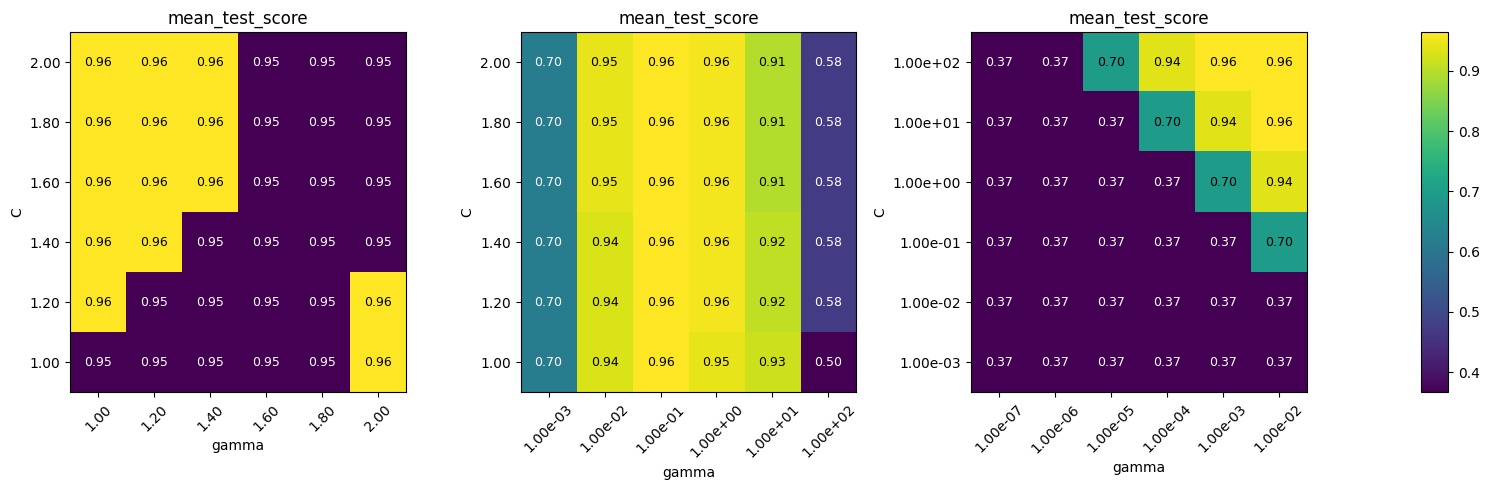

In [ ]:
fig, all_axes = plt.subplots(1, 4, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1, 0.08]})

axes = all_axes[:3]
cax = all_axes[3] 

im = None
for param_grid, ax in zip(param_grids, axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, error_score=np.nan)
    grid_search.fit(X_train, y_train)

    Cs = param_grid['C']
    Gammas = param_grid['gamma']
    n_C = len(Cs)
    n_gamma = len(Gammas)

    arr = np.array(grid_search.cv_results_['mean_test_score'], dtype=float)
    if arr.size != n_C * n_gamma:
        raise ValueError(f"Unexpected number of scores: {arr.size}, expected {n_C*n_gamma}")

    scores = arr.reshape(n_C, n_gamma)

    im = ax.imshow(scores, origin='lower', cmap='viridis', aspect='auto')

    ax.set_xticks(np.arange(n_gamma))
    ax.set_xticklabels([f"{g:.2e}" if (np.ptp(np.log10(Gammas))>0.5) else f"{g:.2f}" for g in Gammas], rotation=45)
    ax.set_yticks(np.arange(n_C))
    ax.set_yticklabels([f"{c:.2e}" if (np.ptp(np.log10(Cs))>0.5) else f"{c:.2f}" for c in Cs])
    ax.set_xlabel('gamma')
    ax.set_ylabel('C')
    ax.set_title('mean_test_score')

    cmap = plt.cm.get_cmap('viridis')
    norm = plt.Normalize(vmin=np.nanmin(scores), vmax=np.nanmax(scores))
    for i in range(n_C):
        for j in range(n_gamma):
            val = scores[i, j]
            txt = "nan" if np.isnan(val) else f"{val:.2f}"
            if np.isnan(val):
                rgba = (0.5, 0.5, 0.5, 1.0)
            else:
                rgba = cmap(norm(val))
            lum = 0.2126*rgba[0] + 0.7152*rgba[1] + 0.0722*rgba[2]
            color = "white" if lum < 0.5 else "black"
            ax.text(j, i, txt, ha='center', va='center', color=color, fontsize=9)

fig.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()

In [59]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(f"Grids list:\n{param_grid}")


Grids list:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [60]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best paremeters: {grid_search.best_params_}")
print(f"Cross validation best score: {grid_search.best_score_:.2f}")

Best paremeters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Cross validation best score: 0.97


In [61]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000352,0.000352,0.000278,0.000266,0.000258,0.000264,0.000258,0.000271,0.00027,0.000256,0.000265,0.000299,0.000247,0.000245,0.000242,0.000228,0.000254,0.000286,0.000245,0.000211,0.000196,0.000221,0.000314,0.000315,0.000226,0.000177,0.000179,0.000223,0.000314,0.000306,0.000188,0.000193,0.000167,0.000203,0.000283,0.0003,0.000261,0.000222,0.000212,0.000168,0.000197,0.000184
std_fit_time,0.000094,0.000168,0.00003,0.000007,0.000002,0.000007,0.000004,0.000046,0.00003,0.000002,0.000002,0.000045,0.000008,0.000003,0.000038,0.000006,0.000005,0.000017,0.000007,0.000007,0.000007,0.000006,0.000023,0.000012,0.000023,0.000004,0.000013,0.000006,0.000032,0.000013,0.000007,0.00001,0.000004,0.000003,0.000007,0.00001,0.000033,0.000011,0.00004,0.000004,0.000055,0.000015
mean_score_time,0.000214,0.000219,0.000186,0.000178,0.000174,0.000179,0.000176,0.000225,0.000204,0.000178,0.00017,0.00018,0.000179,0.000174,0.000173,0.000169,0.000177,0.000181,0.00017,0.000162,0.000141,0.000142,0.000179,0.000175,0.000189,0.000131,0.000153,0.000136,0.000173,0.000174,0.00014,0.000142,0.000119,0.000129,0.000162,0.000172,0.000147,0.000127,0.000261,0.000113,0.00012,0.000118
std_score_time,0.000043,0.000064,0.000004,0.000008,0.000002,0.000002,0.000003,0.000089,0.000045,0.000004,0.000005,0.000017,0.000006,0.000002,0.000016,0.000011,0.000001,0.000019,0.000006,0.000003,0.000005,0.000005,0.000025,0.000005,0.000057,0.000004,0.000052,0.000005,0.000028,0.000005,0.000003,0.000025,0.000003,0.000007,0.000007,0.000007,0.000032,0.000003,0.000258,0.000001,0.000013,0.000005
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}",

In [62]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print(f"Cross validation score: {scores}")
print(f"Cross validation score mean: { scores.mean()}")

Cross validation score: [0.96666667 1.         0.9        0.96666667 1.        ]
Cross validation score mean: 0.9666666666666668


In [65]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)


scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print(f"Cross validation score: {scores}")

Cross validation score: [0.96666667 1.         0.96666667 0.96666667 1.        ]
